# Working on THE titanic dataset

## 1. Knowing the data

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/titanic-dataset/train.csv')

In [128]:
df.shape 

(891, 12)

In [129]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.00,C93,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.90,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.80,NaN,S


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [132]:
df.drop(['Name','PassengerId','Cabin','Ticket'], axis=1, inplace=True) # dropping "potentially" useless columns

In [133]:
df.dropna(subset=['Embarked'], inplace=True) # dropping less than 2% of columns

In [134]:
df.shape

(889, 8)

In [135]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
df.corr()['Survived']

Survived    1.000000
Pclass     -0.335549
Age        -0.082446
SibSp      -0.034040
Parch       0.083151
Fare        0.255290
Name: Survived, dtype: float64

## 2. Preprocessing the data

In [137]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


_encoding categorical data_

In [138]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [139]:
from sklearn.preprocessing import OneHotEncoder
 
categorical_columns = ['Sex', 'Embarked']
ohe = OneHotEncoder(sparse=False, drop='first')

In [140]:
encoded_features = ohe.fit_transform(df[categorical_columns])
encoded_features_names = ohe.get_feature_names_out(categorical_columns)

In [141]:
encoded_features_names

array(['Sex_male', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [142]:
encoded_df = pd.DataFrame(encoded_features, columns=encoded_features_names)
df = pd.concat([df.drop(columns=categorical_columns) , encoded_df], axis=1, )

In [143]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


_simple imputing age_

In [144]:
df['Age'].isnull().mean() * 100

20.089786756453424

In [167]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.pipeline import FeatureUnion

imputer = SimpleImputer(strategy='most_frequent', add_indicator=False)

df_imputed = imputer.fit_transform(df)
df_imputed.shape

(891, 9)

In [173]:
df = pd.DataFrame(df_imputed, columns=df.columns)

In [176]:
df['Age'].isnull().sum()

0

## 3. EDA

In [177]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [178]:
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

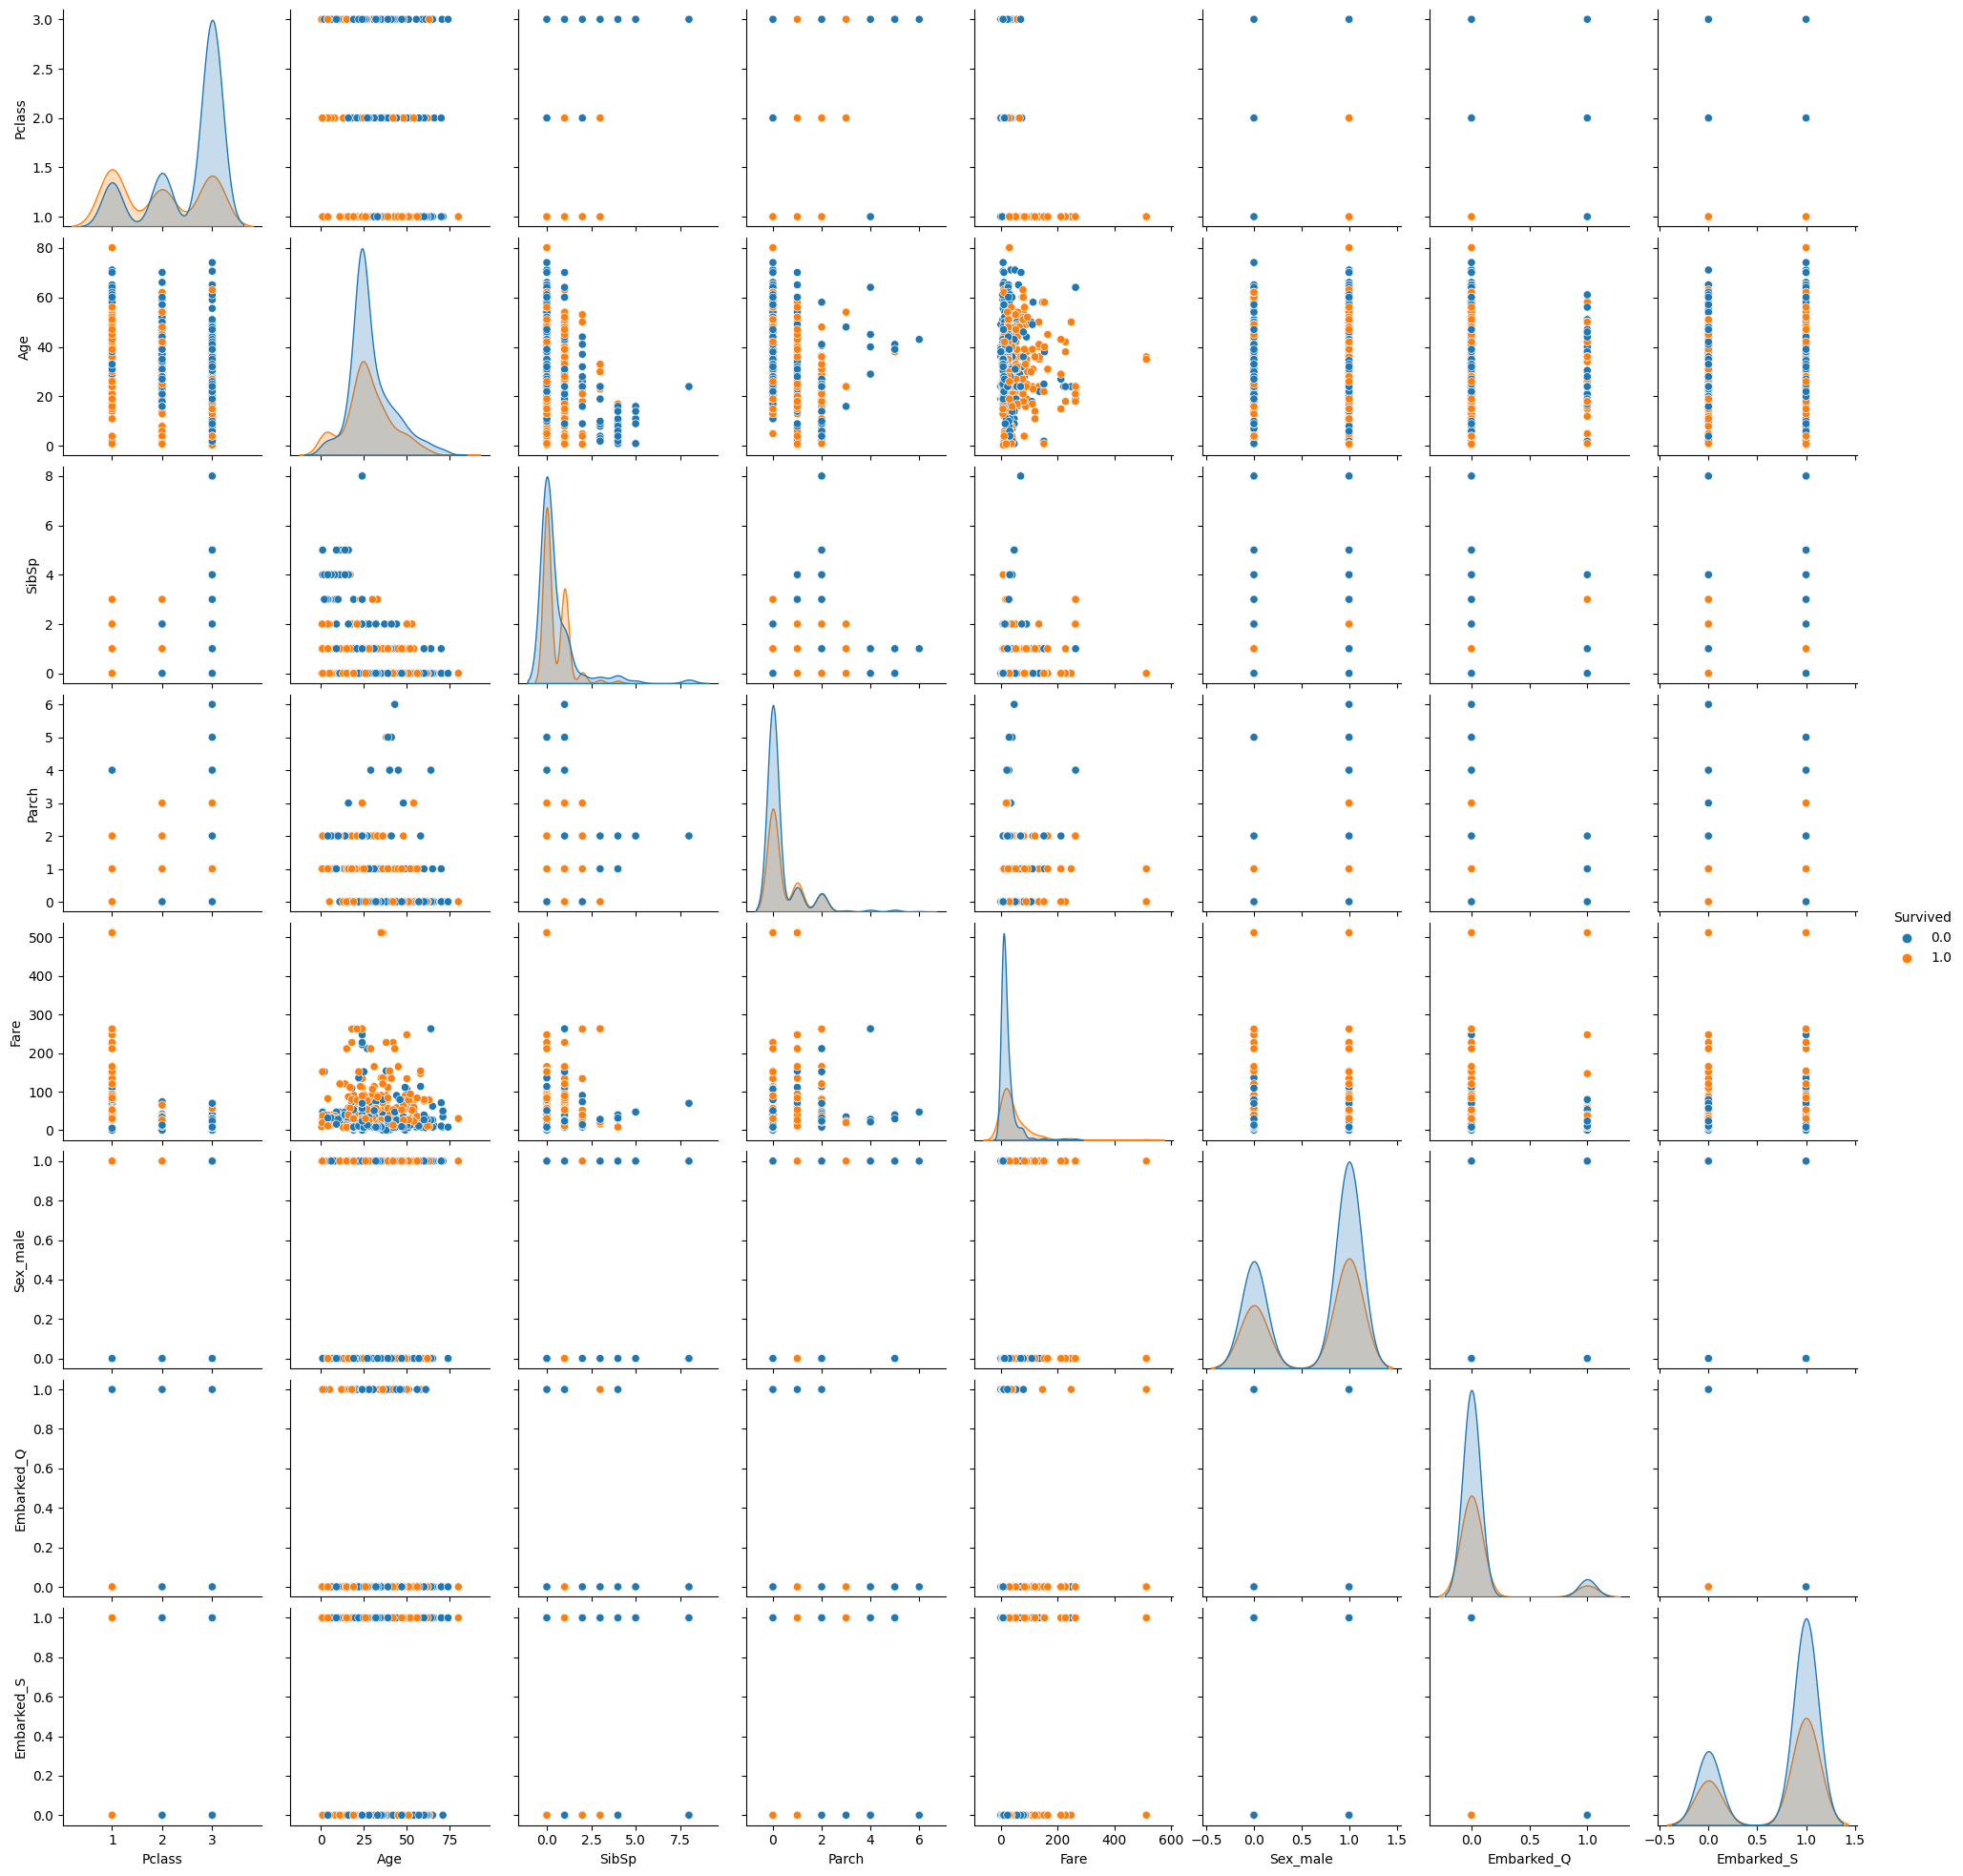

In [179]:
import seaborn as sns

sns.pairplot(df, hue='Survived')

## 3. Modelling

In [181]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

In [196]:
# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=100),
    'Random Forest': RandomForestClassifier(n_estimators=500),
    'SVC': SVC(kernel='sigmoid')
}

# Train and evaluate each classifier using cross-validation
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=2)
    print(f"{clf_name}: Accuracy = {np.mean(scores):.2f} (± {np.std(scores):.2f})")

Logistic Regression: Accuracy = 0.70 (± 0.00)
Decision Tree: Accuracy = 0.63 (± 0.00)
Random Forest: Accuracy = 0.68 (± 0.01)
SVC: Accuracy = 0.58 (± 0.02)


In [206]:
# using gridsearchcv on random forest
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'bootstrap': [True, False]                  # Method of sampling data points (with or without replacement)
}
rf_clf = RandomForestClassifier(random_state=42)
rand_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, cv=5, scoring='accuracy', verbose=1)


In [209]:
rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [210]:
rand_search.best_score_

0.7092189500640205

In [211]:
# using xgboooost
import xgboost as xgb

In [212]:
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],          # Learning rate
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],                # Maximum depth of the tree
    'min_child_weight': [1, 2, 3, 4, 5],                   # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],                      # Minimum loss reduction required to make a further partition
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],                # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],         # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5, 1],                         # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1],                        # L2 regularization term on weights
    'n_estimators': [100, 200, 300, 400, 500]              # Number of boosted trees to fit
}

In [216]:
xgb_clf = xgb.XGBClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='accuracy', verbose=1, random_state=42)

In [217]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                         

In [220]:
random_search.best_score_

0.7190584063823501

In [221]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

In [234]:
from sklearn.metrics import accuracy_score
y_pred = best_estimator.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Testing Set: {accuracy:.2f}")


Accuracy on Testing Set: 0.74


### Kaggle submission

In [232]:
test_data = pd.read_csv('../data/titanic-dataset/test.csv')
test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [235]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load test data
test_data = pd.read_csv('../data/titanic-dataset/test.csv')

# Drop columns (similar to training data)
test_data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

# Impute missing values in 'Age' and 'Fare' columns
imputer = SimpleImputer(strategy='most_frequent')
test_data[['Age', 'Fare']] = imputer.fit_transform(test_data[['Age', 'Fare']])

# Encode categorical columns ('Sex' and 'Embarked')
categorical_columns = ['Sex', 'Embarked']
ohe = OneHotEncoder(sparse=False, drop='first')
encoded_features = ohe.fit_transform(test_data[categorical_columns])
encoded_features_names = ohe.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_features_names)

# Drop original categorical columns and concatenate encoded features
test_data.drop(columns=categorical_columns, inplace=True)
test_data = pd.concat([test_data, encoded_df], axis=1)

# Ensure the column order is the same as in training data
test_data = test_data[X_train.columns]  # Assuming X_train columns dictate the order

# Display sample of preprocessed test data
test_data.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [236]:
test_predictions = best_estimator.predict(test_data)

# Optionally, you can create a submission DataFrame if required by Kaggle
submission_df = pd.DataFrame({
    'PassengerId': pd.read_csv('../data/titanic-dataset/test.csv')['PassengerId'],
    'Survived': test_predictions
})

# Save submission file
submission_df.to_csv('submission.csv', index=False)